<a href="https://colab.research.google.com/github/shaoni11/tech_gig_hackathon/blob/main/Phising_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Phising Detection***

**1.Project Description**

As each coin has two sides, so does technology. On one hand, with the advancement in technology the lives are getting better, on the other hand, the ill use of technology is also increasing. The suspicious activities are increasing ranging from dos attacks, phishing, hacking etc. In this hackathon, we are concerned with the increasing phishing attacks.


Typically, Phishing is a type of social engineering where an attacker sends a fraudulent (e.g., spoofed, fake, or otherwise deceptive) message designed to trick a person into revealing sensitive information to the attacker or to deploy malicious software on the victim's infrastructure like ransomware.

**2. Problem Statement**

*   Problem statement for this business problem is to identify if the   website is legitimate or a phishing website. 
*   The idea is to use data to predict whether it is a phising website or legitimate one.

*   The Result will be determined by the two values [1, -1] where 1 represent the legitimate and -1 represents phishing.

**3.Installing & Importing Libraries**

In [1]:
#!pip install  pandas-profiling --upgrade
#After upgrading, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [2]:
import pandas as pd  
import numpy as np
import csv
from scipy.stats import norm, skew

# For Panel Data Analysis
import pandas as pd 
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

# For Data Visualization 
import matplotlib.pyplot as plt        
import seaborn as sns 
%matplotlib inline 
sns.set()
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)    # To apply seaborn styles to the plots.
import datetime as dt

# For Data Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#For Data Encoding 
from sklearn.model_selection import  train_test_split

#For Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import metrics

### **4.Data Acquisition & Description**

The data set consists of 30 features of a phishing website. The value of attributes can be [1, 0, -1] except the key value which is incremental.

1 represents the legitimate

0 represents suspicious

-1 represents phishing


In [3]:
#importing data

train = pd.read_csv("/content/drive/MyDrive/data/HPE_Complete-Dataset/Complete_Dataset/Phising_Training_Dataset.zip")
test = pd.read_csv("/content/drive/MyDrive/data/HPE_Complete-Dataset/Complete_Dataset/Phising_Testing_Dataset.zip")

In [4]:
train.isnull().sum(axis=0)  #Checking missing data in the dataset

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
train.dtypes   #checking column datatypes

key                            int64
having_IP                      int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [6]:
test.dtypes

key                            int64
having_IP                      int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [7]:
print(train.shape)
print(test.shape)

(8955, 32)
(2100, 31)


Data Description

In [8]:
#checking the data description of  data
train.describe()

key    having_IP   URL_Length  Shortining_Service  \
count   8955.000000  8955.000000  8955.000000         8955.000000   
mean   16821.000000     0.307203    -0.635734            0.740480   
std     2585.230164     0.951697     0.763660            0.672116   
min    12344.000000    -1.000000    -1.000000           -1.000000   
25%    14582.500000    -1.000000    -1.000000            1.000000   
50%    16821.000000     1.000000    -1.000000            1.000000   
75%    19059.500000     1.000000    -1.000000            1.000000   
max    21298.000000     1.000000     1.000000            1.000000   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
count       8955.000000               8955.000000    8955.000000   
mean           0.709436                  0.740704      -0.735343   
std            0.704809                  0.671870       0.677733   
min           -1.000000                 -1.000000      -1.000000   
25%            1.000000                  1.000000      -1.000000   
50%            1.000000                  1.000000      -1.000000   
75%            1.000000                  1.000000      -1.000000   
max            1.000000                  1.000000       1.000000   

       having_Sub_Domain  SSLfinal_State  Domain_registeration_length  \
count        8955.000000     8955.000000                   8955.00000   
mean            0.071803        0.264545                     -0.33646   
std             0.817419        0.908003                      0.94175   
min            -1.000000       -1.000000                     -1.00000   
25%            -1.000000       -1.000000                     -1.00000   
50%             0.000000        1.000000                     -1.00000   
75%             1.000000        1.000000                      1.00000   
max             1.000000        1.000000                      1.00000   

           Favicon         port  HTTPS_token  Request_URL  URL_of_Anchor  \
count  8955.000000  8955.000000  8955.000000  8955.000000    8955.000000   
mean      0.623227     0.735343     0.666108     0.191066      -0.076717   
std       0.782084     0.677733     0.745897     0.981632       0.710203   
min      -1.000000    -1.000000    -1.000000    -1.000000      -1.000000   
25%       1.000000     1.000000     1.000000    -1.000000      -1.000000   
50%       1.000000     1.000000     1.000000     1.000000       0.000000   
75%       1.000000     1.000000     1.000000     1.000000       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       Links_in_tags          SFH  Submitting_to_email  Abnormal_URL  \
count    8955.000000  8955.000000          8955.000000   8955.000000   
mean       -0.118816    -0.595087             0.633054      0.702289   
std         0.761743     0.757789             0.774151      0.711931   
min        -1.000000    -1.000000            -1.000000     -1.000000   
25%        -1.000000    -1.000000             1.000000      1.000000   
50%         0.000000    -1.000000             1.000000      1.000000   
75%         0.000000    -1.000000             1.000000      1.000000   
max         1.000000     1.000000             1.000000      1.000000   

          Redirect  on_mouseover   RightClick  popUpWidnow       Iframe  \
count  8955.000000   8955.000000  8955.000000  8955.000000  8955.000000   
mean      0.113903      0.771301     0.920045     0.606700     0.829816   
std       0.317711      0.636506     0.391835     0.794975     0.558069   
min       0.000000     -1.000000    -1.000000    -1.000000    -1.000000   
25%       0.000000      1.000000     1.000000     1.000000     1.000000   
50%       0.000000      1.000000     1.000000     1.000000     1.000000   
75%       0.000000      1.000000     1.000000     1.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

       age_of_domain    DNSRecord  web_traffic    Page_Rank  Google_Index  \
count    8955.000000  8955.000000  8

## **5. Data Preprocessing**

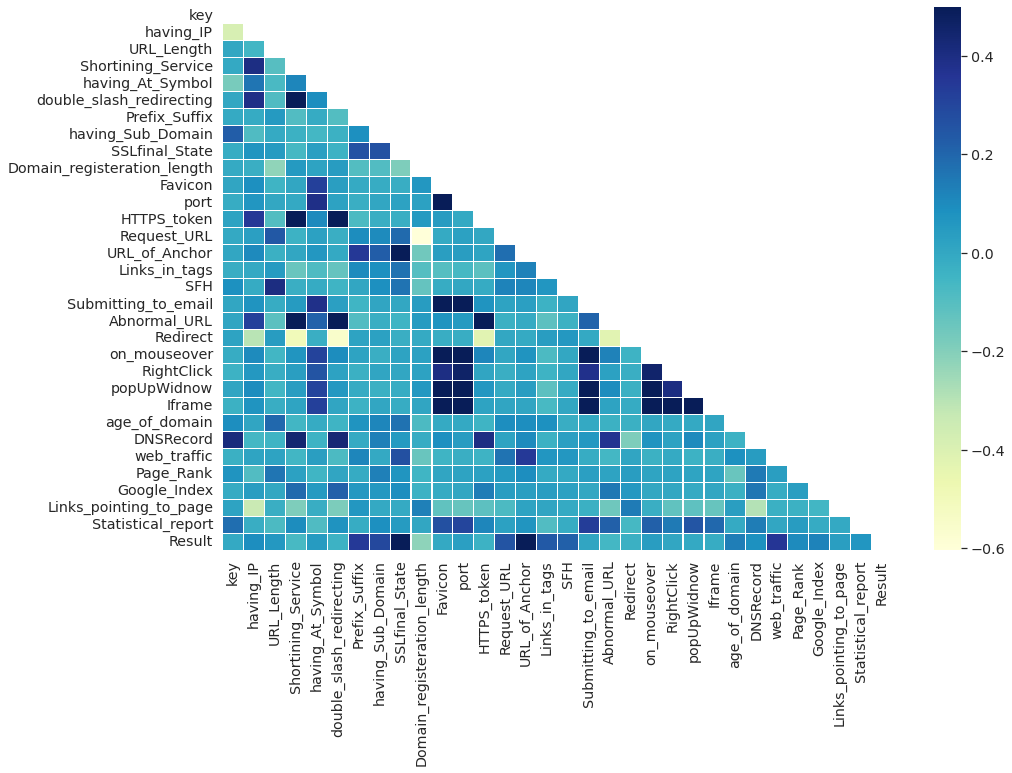

In [9]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [10]:
# Pre-profiling report
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Pre-Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [11]:
#generating  the profiling report 
profile.to_notebook_iframe()

In [12]:
#getting all the numerical variables in our dataset
num_feature = []
def features(df):
   for i in df.columns.values:
    if ((df[i].dtype == int) | (df[i].dtype == float)):
      num_feature.append(i)
      

features(train)

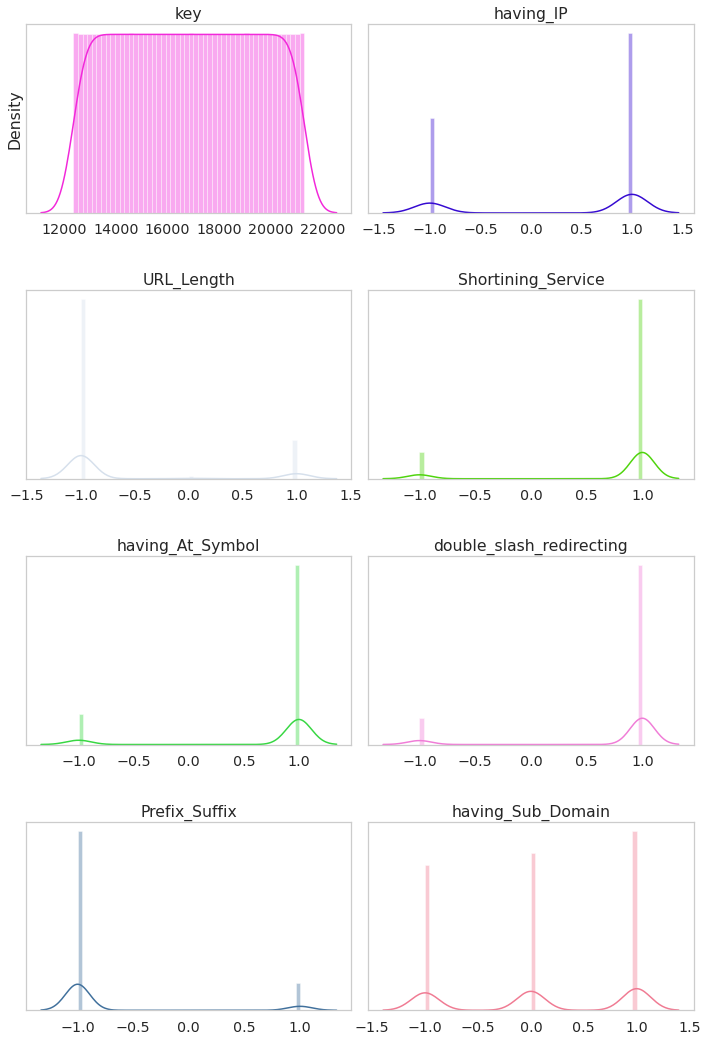

In [13]:
#plotting all the numerical values
# For Random seed values
from random import randint
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(10, 15))

colors = []
for i in range(8):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, num_feature, colors):
  sns.distplot(a = train[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.set_xlabel(' ')
  ax.grid(False)
plt.tight_layout()
plt.show()

Handling multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(train)

variables        VIF
0                           key  12.249115
1                     having_IP   1.934438
2                    URL_Length   2.534795
3            Shortining_Service   9.979541
4              having_At_Symbol   2.976309
5      double_slash_redirecting  10.611726
6                 Prefix_Suffix   2.607917
7             having_Sub_Domain   1.217157
8                SSLfinal_State   2.272678
9   Domain_registeration_length   1.860739
10                      Favicon  17.214469
11                         port  11.128421
12                  HTTPS_token   5.309596
13                  Request_URL   1.746074
14                URL_of_Anchor   2.167274
15                Links_in_tags   1.152610
16                          SFH   2.130092
17          Submitting_to_email   5.465842
18                 Abnormal_URL   6.299954
19                     Redirect   1.759425
20                 on_mouseover   6.042224
21                   RightClick  11.353330
22                  popUpWidnow  14.539654
23                       Iframe   8.977770
24                age_of_domain   1.179021
25                    DNSRecord   2.144171
26                  web_traffic   1.373982
27                    Page_Rank   1.502932
28                 Google_Index   2.337582
29       Links_pointing_to_page   1.991782
30           Statistical_report   2.952677
31                       Result   3.395974

In [15]:
column_name = ['Favicon','double_slash_redirecting','popUpWidnow']

In [16]:
def drop_correlated_features(df):
  for col in df.columns:
    if col in column_name:
      del df[col]

drop_correlated_features(train)
drop_correlated_features(test)  #Dropping multicollinear columns for test data

In [17]:
#Post-Profiling report
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Post-Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [18]:
#generating  the post-profiling report 
profile.to_notebook_iframe()

## **6.Data Preperation**

In [19]:
#Preparing X & Y for training dataset
Y = train['Result']                              # Target column
X = train.drop(['Result','key'],axis=1)          # Dropped target column & ID from feature set

#Preparing X for test data
X_test = test
X_test= X_test.drop(['key'],axis=1)

Scaling of data

In [20]:
# Standardization - Standardize features by removing the mean and scaling to unit standard deviation 
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_scaled = Scaler_X.fit_transform(X)
X_test_scaled = Scaler_X.transform(X_test)

In [21]:
X_train, X_val, Y_train, Y_val=train_test_split(X_scaled,Y,test_size=0.25,random_state=0)

Observation:

Now that we have split out our data, we are good to go with model development.

## **7.Modelling and Prediction**

In [22]:
algos = [RandomForestClassifier(),  LogisticRegression(), DecisionTreeClassifier()] 

names = ['RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier'] 
accuracy_list = []
recall_list = []
precision_list = []

Build Model

In [23]:
for name in algos:
    model = name
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_val)
    Accuracy= metrics.accuracy_score(Y_val,y_pred)
    acc = np.round(Accuracy,3)
    accuracy_list.append(acc)
    Precision= metrics.precision_score(Y_val,y_pred)
    prec = np.round(Precision,3)
    precision_list.append(prec)
    Recall= metrics.recall_score(Y_val,y_pred)
    rec = np.round(Recall,3)
    recall_list.append(rec)

Evaluate Model

In [24]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision': precision_list,
                           'Recall': recall_list})
evaluation

Model  Accuracy  Precision  Recall
0  RandomForestClassifier     0.968      0.961   0.982
1      LogisticRegression     0.920      0.915   0.942
2  DecisionTreeClassifier     0.960      0.962   0.965

From above result, We can say Random Forest works better in the daataset.


### Using Best Model for Prediction on test data

In [25]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
y_pred = RF.predict(X_val)
test_pred = RF.predict(X_test)
cm_RF=confusion_matrix(Y_val, y_pred)
print(test_pred)

[ 1 -1 -1 ... -1  1  1]


In [26]:
print(cm_RF)

[[ 955   43]
 [  26 1215]]


In [27]:
def test_performance(Y_pred,model,cm):
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    toplam =tp+tn+fp+fn
    sens=tp/(tp+fn)*100
    spec=tn/(tn+fp)*100
    fpr =fp/(tn+fp)
    print("\n",model)
    print("\t",np.round(sens,3),"% Sensitivity")
    print("\t",np.round(spec,3),"% Specificity")
    print("\t",np.round(fpr,3),"False Positive Rate")


test_performance(y_pred,"Random Forest",cm_RF) 


 Random Forest
	 97.35 % Sensitivity
	 96.582 % Specificity
	 0.034 False Positive Rate


In [28]:
test['Result'] = test_pred

In [29]:
test[['key', 'Result']].to_csv('final_submission.csv', index=False)